<a href="https://colab.research.google.com/github/tobias-fyi/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading Datasets

This assignment is purposely semi-open-ended you will be asked to load datasets both from github and also from CSV files from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Remember that the UCI datasets may not have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally, on github, using the `!curl` shell command, or in some other way before you try and read it in as a dataframe, this will help you catch what would otherwise be unforseen problems.


## 1) Load a dataset from Github (via its *RAW* URL)

Pick a dataset from the following repository and load it into Google Colab. Make sure that the headers are what you would expect and check to see if missing values have been encoded as NaN values:

<https://github.com/ryanleeallred/datasets>

In [0]:
# Import Pandas
import pandas as pd

In [0]:
# Fetch data from github url and read into a pandas dataframe
data_url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/churn.csv"
churn_data = pd.read_csv(data_url)
# More browsing to be sure everything worked correctly
churn_data.head(16)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,?,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,?,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,?,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.7,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,?,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,?,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [0]:
# From browsing the data it seems NaN values are encoded as "?"
# As was explored in the lecture, I should double check the exact string
# Going to start by looking at row 11 column 4
churn_data.iloc[11][4]

'?'

In [0]:
# Looks like the NaN are encoded as "?" - no spaces
# Just to be sure, I'll check one more cell in a different column
churn_data.iloc[13][15]

'?'

In [0]:
# Looks good, time to replace them with NaN
# This confirms what I saw while initially browsing the raw data in the browser

# Re-read in the dataset with the NaN argument
data_url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/churn.csv"
churn_data = pd.read_csv(data_url, na_values="?")
# Make sure it worked correctly
churn_data.head(16)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415.0,382-4657,no,yes,25,265.1,110,NaN,197.4,99.0,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False.
1,OH,107,415.0,371-7191,no,yes,26,161.6,123,NaN,195.5,103.0,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False.
2,NJ,137,415.0,358-1921,no,no,0,243.4,114,NaN,121.2,110.0,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False.
3,OH,84,408.0,375-9999,yes,no,0,299.4,71,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False.
4,OK,75,415.0,330-6626,yes,no,0,166.7,113,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3.0,2.73,3,False.
5,AL,118,510.0,391-8027,yes,no,0,223.4,98,37.98,220.6,101.0,18.75,203.9,118,9.18,6.3,6.0,1.70,0,False.
6,MA,121,510.0,355-9993,no,yes,24,218.2,88,37.09,348.5,108.0,29.62,212.6,118,9.57,7.5,7.0,2.03,3,False.
7,MO,147,415.0,329-9001,yes,no,0,157.0,79,26.69,103.1,94.0,8.76,211.8,96,9.53,7.1,NaN,1.92,0,False.
8,LA,117,408.0,335-4719,no,no,0,184.5,97,31.37,351.6,80.0,29.89,215.8,90,9.71,8.7,4.0,NaN,1,False.
9,WV,141,415.0,330-8173,yes,yes,37,258.6,84,43.96,222.0,111.0,18.87,326.4,97,14.69,11.2,5.0,3.02,0,False.


In [0]:
# Verify NaN, pt. 2
churn_data.isnull().sum()

State               0
Account Length      0
Area Code         173
Phone               0
Int'l Plan        528
VMail Plan        349
VMail Message       0
Day Mins            0
Day Calls           0
Day Charge        112
Eve Mins           88
Eve Calls         520
Eve Charge          0
Night Mins          0
Night Calls         0
Night Charge      310
Intl Mins           0
Intl Calls        662
Intl Charge       352
CustServ Calls      0
Churn?              0
dtype: int64

In [0]:
# Look at the summary stats
churn_data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3160.000000,3333.000000,3333.000000,3333.000000,3221.000000,3245.000000,2813.000000,3333.000000,3333.000000,3333.000000,3023.000000,3333.000000,2671.000000,2981.000000,3333.000000
mean,101.064806,436.965506,8.099010,179.775098,100.435644,30.565880,200.968906,100.153928,17.083540,200.872037,100.107711,9.037072,10.237294,4.498690,2.763811,1.562856
std,39.822106,42.234536,13.688365,54.467389,20.069084,9.243649,50.695573,19.911168,4.310668,50.573847,19.568609,2.291737,2.791840,2.504658,0.759105,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.410000,166.600000,87.000000,14.160000,167.000000,87.000000,7.510000,8.500000,3.000000,2.270000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.500000,100.000000,17.120000,201.200000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,415.000000,20.000000,216.400000,114.000000,36.770000,235.200000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 2) Load a dataset from your local machine
Download a dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) and then upload the file to Google Colab either using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

While you are free to try and load any dataset from the UCI repository, I strongly suggest starting with one of the most popular datasets like those that are featured on the right-hand side of the home page. 

Some datasets on UCI will have challenges associated with importing them far beyond what we have exposed you to in class today, so if you run into a dataset that you don't know how to deal with, struggle with it for a little bit, but ultimately feel free to simply choose a different one. 

- Make sure that your file has correct headers, and the same number of rows and columns as is specified on the UCI page. If your dataset doesn't have headers use the parameters of the `read_csv` function to add them. Likewise make sure that missing values are encoded as `NaN`.

In [0]:
# Upload file to Colab server
from google.colab import files
uploaded = files.upload()


Saving adult.data to adult.data


In [0]:
# Set up column headers
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income']

# Read in data with the headers defined above
adult_data = pd.read_csv("adult.data", names=column_headers)
print(adult_data.shape)
adult_data.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
# Loaded dataset has 32,561 rows compared with 48,842 according to the site
# Reading into the "adult.names" file gives some clues for the discrepancy

# Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
# 48842 instances, mix of continuous and discrete    (train=32561, test=16281)

# Convert Unknown to "?"
# Although it says no space, maybe there is a space...

# Reload the dataset with the NaN value argument
adult_data = pd.read_csv("adult.data", names=column_headers, na_values="?")
print(adult_data.shape)
adult_data.head(16)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [0]:
adult_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [0]:
# Without a space did not do anything, so time to investigate
adult_data.iloc[14][13]

' ?'

In [0]:
# Reload the dataset with the new na value argument
adult_data = pd.read_csv("adult.data", names=column_headers, na_values=" ?")
print(adult_data.shape)
adult_data.head(16)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [0]:
# Confirm the NaN values went through correctly
adult_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

## 3) Load a dataset from UCI using `!wget`

"Shell Out" and try loading a file directly into your google colab's memory using the `!wget` command and then read it in with `read_csv`.

With this file we'll do a bit more to it.

- Read it in, fix any problems with the header as make sure missing values are encoded as `NaN`.
- Use the `.fillna()` method to fill any missing values. 
 - [.fillna() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- Create one of each of the following plots using the Pandas plotting functionality:
 - Scatterplot
 - Histogram
 - Density Plot


In [0]:
# Load the "adult" data using the `wget` shell command
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-09-03 21:30:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data.1’

adult.data.1        100%[===================>]   3.79M  7.32MB/s    in 0.5s    

2019-09-03 21:30:57 (7.32 MB/s) - ‘adult.data.1’ saved [3974305/3974305]



In [0]:
# Use same column headers and NaN value from earlier
adult_data = pd.read_csv("adult.data.1", names=column_headers, na_values=" ?")

print(adult_data.shape)
adult_data.head(16)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [0]:
# Make sure NaN values are showing up correctly
adult_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [0]:
# Now time to do something about the NaN values
# First, it would be useful to know more about the columns
# So I know what methods might work best for filling the missing values
(adult_data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [0]:
# Looks like all of the columns with NaN values are "object" datatype
# Looking at the data, none of the missing values are the first row
# That means that the forward fill method should work
adult_data["workclass"] = adult_data["workclass"].fillna(method="ffill")
adult_data["occupation"] = adult_data["occupation"].fillna(method="ffill")
adult_data["native-country"] = adult_data["native-country"].fillna(method="ffill")


In [0]:
# Confirm that the missing values were filled
adult_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [0]:
# Take a look
adult_data.head(16)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


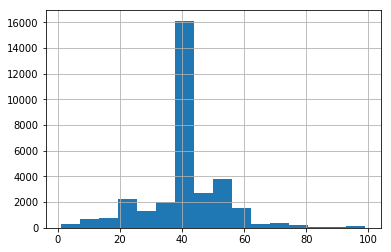

In [0]:
# Plotting the dataset with pandas
# Histogram of Hours per Week
adult_data["hours-per-week"].hist(bins=16);

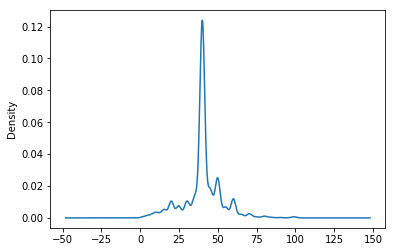

In [0]:
# Density Plot of Hours per Week
adult_data["hours-per-week"].plot.density();

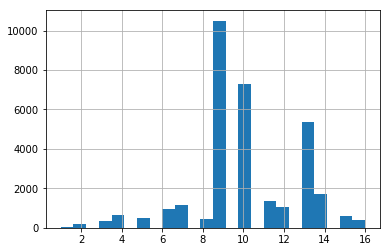

In [0]:
# Histogram of Years of Education
adult_data["education-num"].hist(bins=24);

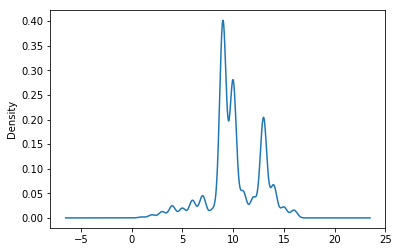

In [0]:
# Density Plot of Years of Education
adult_data["education-num"].plot.density();

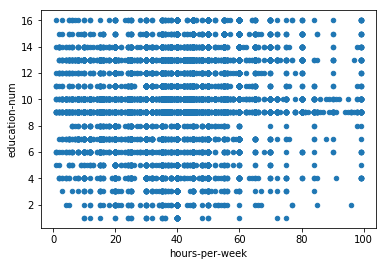

In [0]:
# Scatterplot of hours per week and years of education
adult_data.plot.scatter("hours-per-week", "education-num");

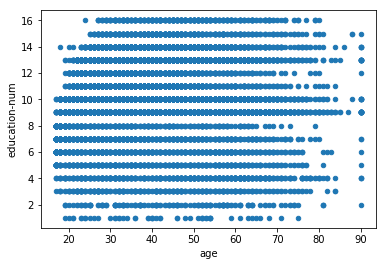

In [0]:
# Scatterplot of age and years of education
adult_data.plot.scatter("age", "education-num");

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

Samantha Finley found [this article](https://www.dataquest.io/blog/python-api-tutorial/) that goes through using the International Space Station API. I'm going to try it out.

In [0]:
# To make API requests over http I'll be using rthe requests library
import requests

In [0]:
# Make a GET request to OpenNotify for the astronauts in space
astros_url = "http://api.open-notify.org/astros.json"
response = requests.get(astros_url)
# To test it out, simply print the response status code
print(response.status_code)

200


In [0]:
# Now try to get a response
data = response.json()
print(data["number"])
print(data)

6
{'message': 'success', 'people': [{'name': 'Alexey Ovchinin', 'craft': 'ISS'}, {'name': 'Nick Hague', 'craft': 'ISS'}, {'name': 'Christina Koch', 'craft': 'ISS'}, {'name': 'Alexander Skvortsov', 'craft': 'ISS'}, {'name': 'Luca Parmitano', 'craft': 'ISS'}, {'name': 'Andrew Morgan', 'craft': 'ISS'}], 'number': 6}


In [0]:
# Now to get the current location of the ISS
iss_now_url = "http://api.open-notify.org/iss-now.json"
response = requests.get(iss_now_url)
iss_now_data = response.json()
print(iss_now_data)

{'message': 'success', 'timestamp': 1567552812, 'iss_position': {'latitude': '-9.9156', 'longitude': '-10.3329'}}


---
---

I spent some more time looking around and found another API that I thought I could use and that might be interesting -  [OpenBrewery DB API.](https://www.openbrewerydb.org/)

In [0]:
# The base endpoint for the openbrewery DB
brew_url = "https://api.openbrewerydb.org/breweries"

In [65]:
r = requests.get(brew_url)
brew_data = r.json()

[{'id': 2, 'name': 'Avondale Brewing Co', 'brewery_type': 'micro', 'street': '201 41st St S', 'city': 'Birmingham', 'state': 'Alabama', 'postal_code': '35222-1932', 'country': 'United States', 'longitude': '-86.774322', 'latitude': '33.524521', 'phone': '2057775456', 'website_url': 'http://www.avondalebrewing.com', 'updated_at': '2018-08-23T23:19:57.825Z', 'tag_list': []}, {'id': 4, 'name': 'Band of Brothers Brewing Company', 'brewery_type': 'micro', 'street': '1605 23rd Ave', 'city': 'Tuscaloosa', 'state': 'Alabama', 'postal_code': '35401-4653', 'country': 'United States', 'longitude': '-87.5621551272424', 'latitude': '33.1984907123707', 'phone': '2052665137', 'website_url': 'http://www.bandofbrosbrewing.com', 'updated_at': '2018-08-23T23:19:59.462Z', 'tag_list': []}, {'id': 44, 'name': 'Trim Tab Brewing', 'brewery_type': 'micro', 'street': '2721 5th Ave S', 'city': 'Birmingham', 'state': 'Alabama', 'postal_code': '35233-3401', 'country': 'United States', 'longitude': '-86.79140006241

In [70]:
# Create a pandas dataframe from the converted json response
brew_df = pd.DataFrame(brew_data)
brew_df.head()

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,tag_list,updated_at,website_url
0,micro,Birmingham,United States,2,33.524521,-86.774322,Avondale Brewing Co,2057775456,35222-1932,Alabama,201 41st St S,[],2018-08-23T23:19:57.825Z,http://www.avondalebrewing.com
1,micro,Tuscaloosa,United States,4,33.1984907123707,-87.5621551272424,Band of Brothers Brewing Company,2052665137,35401-4653,Alabama,1605 23rd Ave,[],2018-08-23T23:19:59.462Z,http://www.bandofbrosbrewing.com
2,micro,Birmingham,United States,44,33.5128492349817,-86.7914000624146,Trim Tab Brewing,2057030536,35233-3401,Alabama,2721 5th Ave S,[],2018-08-23T23:20:31.423Z,http://www.trimtabbrewing.com
3,micro,Huntsville,United States,46,34.7277523,-86.5932014,Yellowhammer Brewery,2569755950,35805-3046,Alabama,2600 Clinton Ave W,[],2018-08-23T23:20:33.102Z,http://www.yellowhammerbrewery.com
4,micro,Wasilla,United States,55,61.5752695,-149.4127103,Bearpaw River Brewing Co,,99654-7679,Alaska,4605 E Palmer Wasilla Hwy,[],2018-08-23T23:20:40.743Z,http://bearpawriverbrewing.com


In [74]:
print(brew_df.dtypes)

brewery_type    object
city            object
country         object
id               int64
latitude        object
longitude       object
name            object
phone           object
postal_code     object
state           object
street          object
tag_list        object
updated_at      object
website_url     object
dtype: object
